# Experiments on Julia package TaylorSeries
Tristan Swanson
<br>
### Primary question:
How does the time complexity of integration change as the complexety of the input function increases?
#### Sub-question:
How does the time complexity of creating a taylor expansion impact the time complexity of integration?

In [1]:
using Pkg;
Pkg.add("TaylorSeries");
using TaylorSeries;
using Plots;
using Printf;

    Updating registry at `C:\Users\Trist\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Trist\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Trist\.julia\environments\v1.7\Manifest.toml`


In [2]:
x = set_variables("x", order=1)

1-element Vector{TaylorN{Float64}}:
  1.0 x + 𝒪(‖x‖²)

In [23]:
function createFunctions(n)
    # n i number of functions
    vfs = []
    for i in 1:n
        if i == 1
            push!(vfs, x -> sin(x) + 1)
        else
            # Functions are defined recusively to ensure increasing compexity
            if i % 2 == 0
                push!(vfs, x -> 1 / vfs[i-1](x))
            else
                push!(vfs, x -> exp(vfs[i-1](x)) / exp(vfs[i-2](x)))
            end
        end
        if isnan(getcoeff(vfs[i], 1))
            @printf("Calculated a NaN coefficent after %d iterations\n", i)
            pop!(vfs)
            break
        end
    end
    
    return vfs
end

LoadError: syntax: unexpected ","

In [25]:
function integrateAll(funcVec)
    for i in 1:length(funcVec)
        taylor_expand(funcVec[i] , 0, order=3+i)
        integrate(funcVec[i], 1)
    end
end

vfs = createFunctions(1000)
#println(length(vfs))
@show vfs[512]
@time integrateAll(vfs)

Calculated a NaN coefficent after 516 iterations
vfs[512] =  1.0 + 5.78960446186581e76 t + 1.6759759912428243e153 t² + 4.3125502563908536e229 t³ + 1.0923482590309185e306 t⁴ + 𝒪(t⁵)
  0.010179 seconds (26.05 k allocations: 4.806 MiB, 85.76% compilation time)


In [51]:
### Timing

function timef(funcmaker, n)
    x = funcmaker(n)
    times_taylor = []
    times_integrate = []
    for i in 1:length(x)
        t_tay = @timed func= taylor_expand(x[i] , 0, order=3+i)
        t_int = @timed integrate(func, 1)
        push!(times_taylor, t_tay.time)
        push!(times_integrate, t_int.time)
    end
    return times_taylor, times_integrate
end

n = 500
times_taylor, times_integrate = timef(createFunctions, n)
TimeTay = sum(times_taylor)
TimeInt = sum(times_integrate)
TotalTime = TimeInt + TimeTay
@printf("The total time for computing all taylor expansions and integrating: %f seconds\n", TotalTime)
@printf("Time expanding taylor series: %f  \n", TimeTay)
@printf("Time integrating taylor series: %f  \n", TimeInt)
@printf("That's a ratio of %f  (expand/integrate)\n", TimeTay/TimeInt)


The total time for computing all taylor expansions and integrating: 0.000674 seconds
Time expanding taylor series: 0.000632  
Time integrating taylor series: 0.000043  
That's a ratio of 14.861176  (expand/integrate)


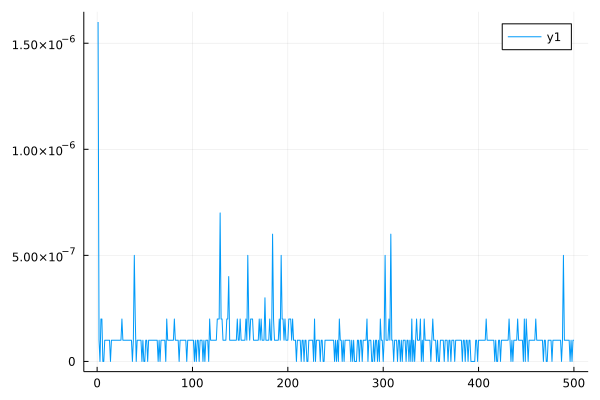

In [50]:
plot(1:length(times_integrate), times_integrate)

This is interesting, it shows that the execution time for integration remains low even for large taylor expansions of complex functions.

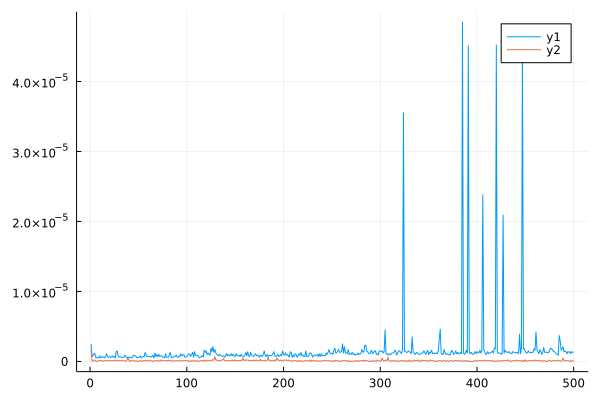

In [49]:
plot(1:length(times_taylor), times_taylor)
plot!(1:length(times_integrate), times_integrate)



### 

Here we get some real results. The time spent integrating taylor expansions is a fraction of the time spent doing the expansion. This is a good view of how powerful taylor expansions can be. 

##### Sources:   
<a href="https://juliadiff.org/TaylorSeries.jl/stable/">TaylorSeries Documentation</a>   
<a href="https://docs.julialang.org/en/v1/">Julia Documentation</a>